In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [24]:
df = pd.read_csv(r'train.csv') 
df
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


# Data Processing

In [16]:
for i in range(0,len(df)):
    if(df['ChestPainType'][i]=="ATA"):
        df['ChestPainType'][i]=1
    elif(df['ChestPainType'][i]=="NAP"):
        df['ChestPainType'][i]=2
    elif(df['ChestPainType'][i]=="ASY"):
        df['ChestPainType'][i]=3
    elif(df['ChestPainType'][i]=="TA"):
        df['ChestPainType'][i]=4
        
print("In General: ")
print("1 means yes")
print("0 means no")
print()

print("In Chest pain type: ")
print("ATA is represented by 1")
print("NAP is represented by 2")
print("ASY is represented by 3")
print("TA is represented by 4")
print()


for i in range(0,len(df)):
    if(df['ExerciseAngina'][i]=="Y"):
        df["ExerciseAngina"][i] = 1
    else:
        df["ExerciseAngina"][i] = 0
        
for i in range(0,len(df)):
    if(df['Sex'][i]=="M"):
        df["Sex"][i] = 1
    else:
        df["Sex"][i] = 0


for i in range(0,len(df)):
    if(df['RestingECG'][i]=="Normal"):
        df['RestingECG'][i]=1
    elif(df['RestingECG'][i]=="ST"):
        df['RestingECG'][i]=2
    elif(df['RestingECG'][i]=="LVH"):
        df['RestingECG'][i]=3
    else:df['RestingECG'][i]=1
        
print("In Resting ECG: ")
print("Normal is represented by 1")
print("ST is represented by 2")
print("LVH is represented by 3")
print()

print("For Sex: ")
print("Male is represented by 1")
print("Female is represented by 1")
print()

for i in range(0,len(df)):
    if(df['ST_Slope'][i]=="Flat"):
        df['ST_Slope'][i]=1
    elif(df['ST_Slope'][i]=="Down"):
        df['ST_Slope'][i]=2
    elif(df['ST_Slope'][i]=="Up"):
        df['ST_Slope'][i]=3
    else:df['ST_Slope'][i]=1
        
print("In ST slope: ")
print("Flat is represented by 1")
print("Down is represented by 2")
print("UP is represented by 3")
print()




df.corr()

In General: 
1 means yes
0 means no

In Chest pain type: 
ATA is represented by 1
NAP is represented by 2
ASY is represented by 3
TA is represented by 4

In Resting ECG: 
Normal is represented by 1
ST is represented by 2
LVH is represented by 3

For Sex: 
Male is represented by 1
Female is represented by 1

In ST slope: 
Flat is represented by 1
Down is represented by 2
UP is represented by 3



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [4]:
dfv = df.values
print(dfv)

[[40 1 1 ... 0.0 3 0]
 [49 0 2 ... 1.0 1 1]
 [37 1 1 ... 0.0 3 0]
 ...
 [57 1 3 ... 1.2 1 1]
 [57 0 1 ... 0.0 1 1]
 [38 1 2 ... 0.0 3 0]]


# Finding the most correlated factor

In [5]:
def myCovariance(x, y):
    sum=0
    a=np.mean(x)
    b=np.mean(y)
    for i in range(0,len(x)):
        sum=sum+((x[i]-a)*(y[i]-b))
    covariance=sum/(len(x)-1)
    return covariance

def mySD(x):
    return math.sqrt(statistics.variance(x))

def myCorrelation(x,y):
    ans = mySD(x)*mySD(y)
    return myCovariance(x,y)/ans

def reg_coeff(x,y):
    return((myCorrelation(x,y)*mySD(y))/mySD(x))
        


In [6]:
age= dfv[:,0]
sex= dfv[:,1]
chestPain= dfv[:,2]
restingBP= dfv[:,3]
cholestrol= dfv[:,4]
fastingBS= dfv[:,5]
restingECG= dfv[:,6]
maxHR= dfv[:,7]
exercise= dfv[:,8]
oldPeak= dfv[:,9]
stSlope= dfv[:,10]
disease= dfv[:,11]


In [7]:
# print("age",myCorrelation(age,disease))
# print("sex",myCorrelation(sex,disease))
# print("chestPain",myCorrelation(chestPain,disease))

# print("fastingBS",myCorrelation(fastingBS,disease))
# print("restingECG",myCorrelation(restingECG,disease))
# print("exercise",myCorrelation(exercise,disease))
# print("stSlope",myCorrelation(stSlope,disease))

# print("maxHR",myCorrelation(maxHR,disease))
# print("oldPeak",myCorrelation(oldPeak,disease))
# print("restingBP",myCorrelation(restingBP,disease))
# print("cholestrol",myCorrelation(cholestrol,disease))

choice = ['maxHR','oldPeak','restingBP','cholestrol']
print(choice[0])

# print("maxHR",myCorrelation(maxHR,cholestrol))

for i in range(len(choice)):
    print(choice[i])
    print("maxHR",myCorrelation(maxHR,choice[i]))
    print("oldPeak",myCorrelation(oldPeak,choice[i]))
    print("restingBP",myCorrelation(restingBP,choice[i]))
    print("cholestrol",myCorrelation(cholestrol,choice[i]))
    print()
print("As we can see the maximum correlation is approximately 0.4 with maxHR")

maxHR
maxHR


TypeError: can't convert type 'str' to numerator/denominator

In [8]:
reg_coeff(maxHR,disease)

-0.00782294492852905

In [9]:
data1 = "Cholesterol"
data2 ="HeartDisease"

In [10]:
print("Calculating the data for",data1,"and",data2)

Calculating the data for Cholesterol and HeartDisease


In [11]:
# for i in range(len(stSlope)):
#     df['ST_Slope'][i] /=3
# df

In [12]:
def B1(data1,data2):
    x_mean = np.mean(df[data1])
    y_mean = np.mean(df[data2])

    dfx = df[data1]-x_mean
    dfy = df[data2]-y_mean
    dfx_sq = dfx*dfx
    dfxy = dfx*dfy
    dfxy_sum = dfxy.sum()
    dfx_sq_sum = dfx_sq.sum()

    return dfxy_sum/dfx_sq_sum

def B0(data1,data2,B1):
    y_sum = df[data1].sum()
    x_sum = df[data2].sum()
    count = df[data1].count()
    return (y_sum - B1*x_sum)/count
    
    

In [13]:
b1 = B1(data1, data2)
print("value of B1 is",b1)

value of B1 is -0.001058365375835434


In [14]:
b0 = B0(data1,data2,b1)
print("value of B0 is",b0)

value of B0 is 198.80014994510995


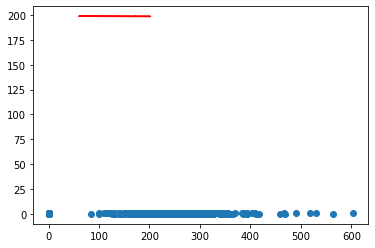

In [15]:
# y = cholestrol
x = maxHR
y = b0 + b1*x
plt.scatter(df[data1],df[data2])
plt.plot(x,y,'r')
# df[data2]